First 5 rows of the dataset:
   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHour

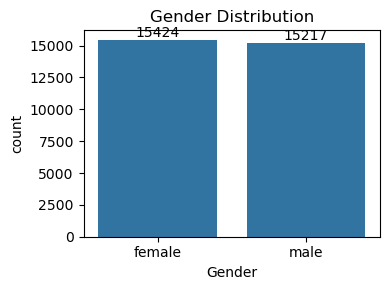


Average Scores by Parental Education Level:
                     MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


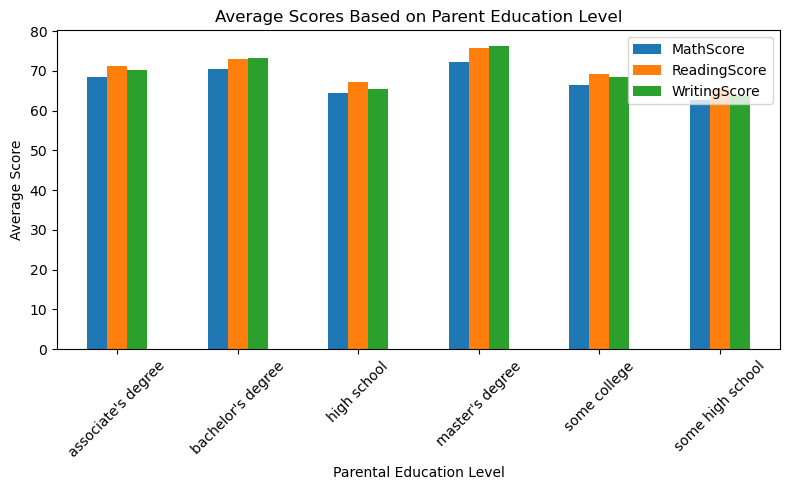

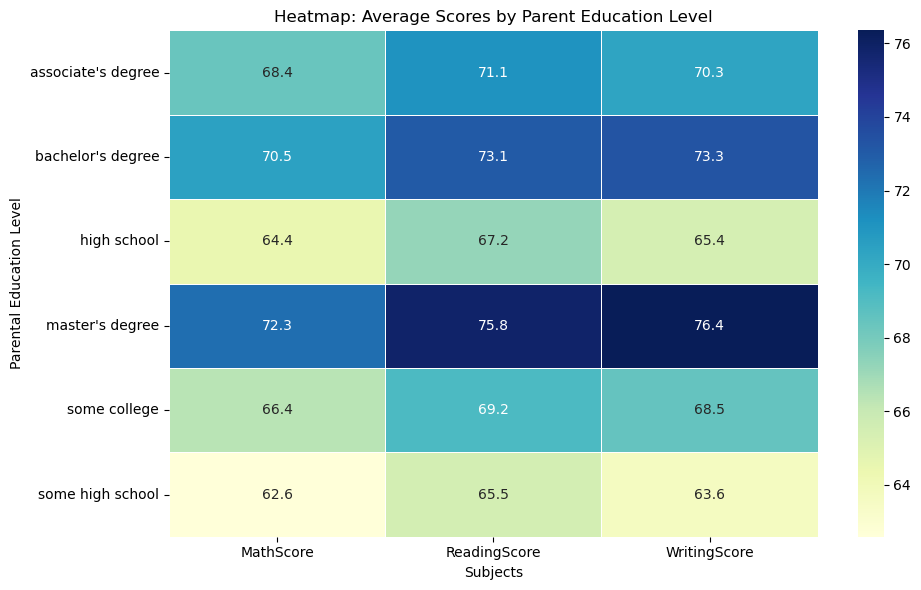

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("Expanded_data_with_more_features.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Summary statistics
print("\nDescriptive statistics:")
print(df.describe())

# Data info
print("\nDataset info:")
print(df.info())

# Check for missing values
null_counts = df.isnull().sum()
print("\nNull Values:\n", null_counts)

# Gender distribution plot
plt.figure(figsize=(4, 3))
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

# Group by Parent Education and calculate mean scores
gb = df.groupby('ParentEduc').agg({
    "MathScore": 'mean',
    "ReadingScore": 'mean',
    "WritingScore": "mean"
})

# Display the grouped data
print("\nAverage Scores by Parental Education Level:\n", gb)

# Bar plot of average scores based on parent education
gb.plot(kind='bar', figsize=(8, 5))
plt.title("Average Scores Based on Parent Education Level")
plt.ylabel("Average Score")
plt.xlabel("Parental Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap of average scores by parental education
plt.figure(figsize=(10, 6))  # Bigger size for better visibility
sns.heatmap(gb, 
            annot=True,          # Show values
            cmap='YlGnBu',       # Good color scale
            linewidths=0.5,      # Grid lines between cells
            fmt=".1f")           # Format floats to 1 decimal
plt.title("Heatmap: Average Scores by Parent Education Level")
plt.ylabel("Parental Education Level")
plt.xlabel("Subjects")
plt.tight_layout()
plt.show()



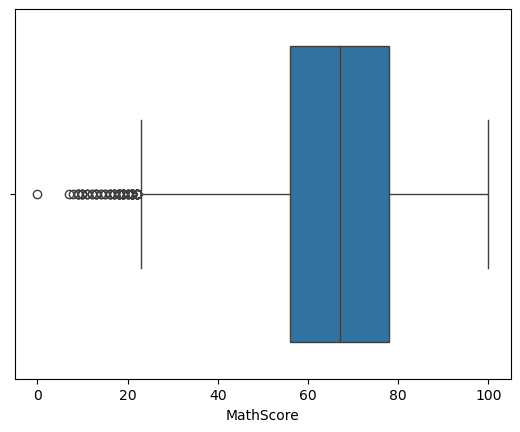

In [4]:
sns.boxplot(data=df, x="MathScore")
plt.show()

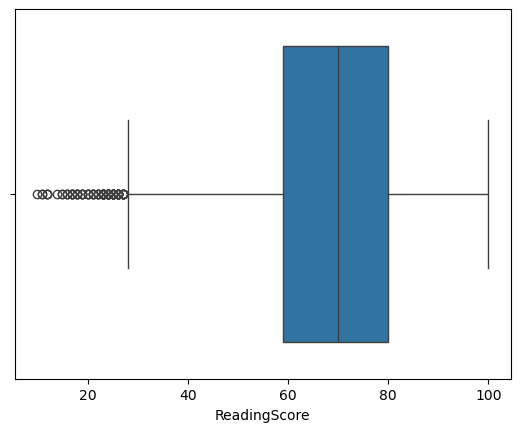

In [5]:
sns.boxplot(data=df, x="ReadingScore")
plt.show()

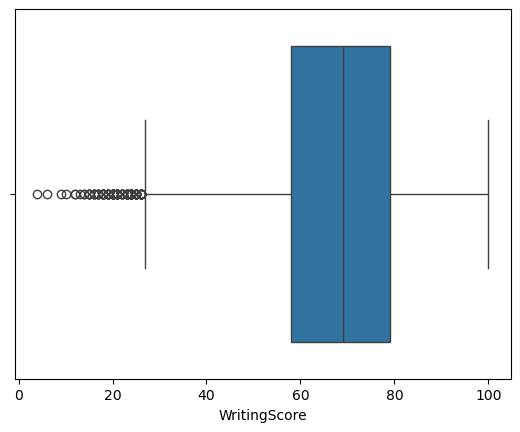

In [7]:
sns.boxplot(data=df, x="WritingScore")
plt.show()

In [8]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


#Distribution of Ethnic Group 

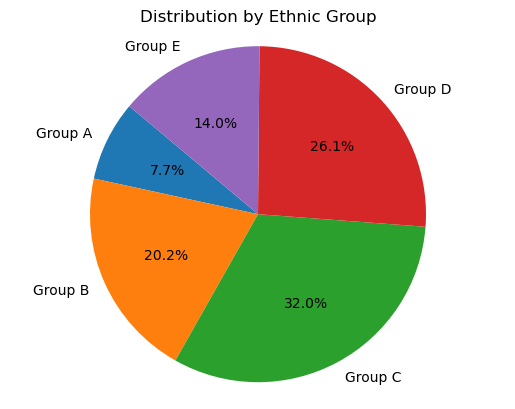

In [16]:
GroupA = df.loc[df["EthnicGroup"] == 'group A'].count()
GroupB = df.loc[df["EthnicGroup"] == 'group B'].count()
GroupC = df.loc[df["EthnicGroup"] == 'group C'].count()
GroupD = df.loc[df["EthnicGroup"] == 'group D'].count()
GroupE = df.loc[df["EthnicGroup"] == 'group E'].count()



# Assuming GroupA to GroupE have been defined as counts before this
Mlist = [GroupA["EthnicGroup"], GroupB["EthnicGroup"], GroupC["EthnicGroup"],
         GroupD["EthnicGroup"], GroupE["EthnicGroup"]]

labels = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']

plt.pie(Mlist, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Ethnic Group')
plt.axis('equal')  # Optional: makes the pie a circle
plt.show()



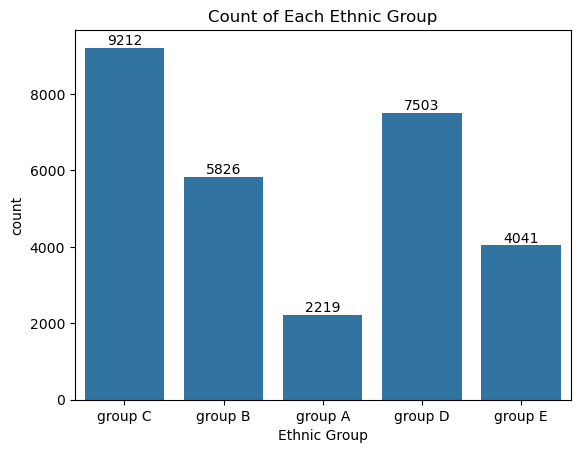

In [19]:



ax = sns.countplot(data=df, x="EthnicGroup")

# Add labels on top of the bars
ax.bar_label(ax.containers[0])

plt.title("Count of Each Ethnic Group")
plt.xlabel("Ethnic Group")
plt.show()
